In [2]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import img_to_array

from matplotlib import pyplot
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Plot descriptive images

In [3]:
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
# print all the clothing classes
cl_classes = np.unique(trainy)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", 
               "Sneaker", "Bag", "Ankle boot"]
print("Clothing classes: ", cl_classes)
print("Class names: ", class_names)

Clothing classes:  [0 1 2 3 4 5 6 7 8 9]
Class names:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Class:  0


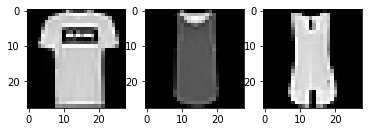

Class:  1


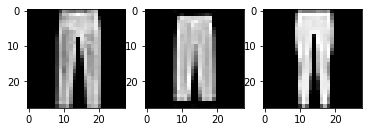

Class:  2


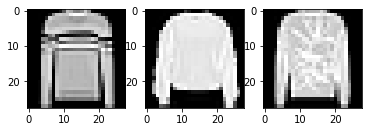

Class:  3


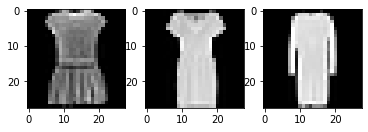

Class:  4


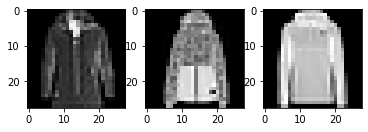

Class:  5


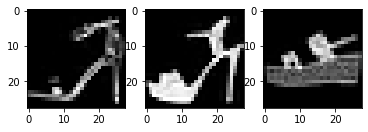

Class:  6


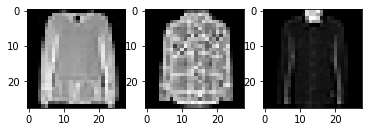

Class:  7


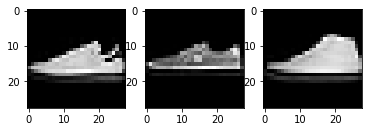

Class:  8


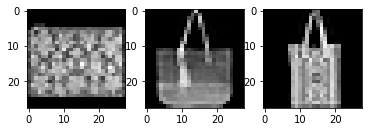

Class:  9


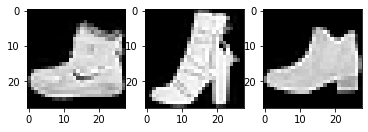

In [5]:
# plot two images from each class
for cl_class in cl_classes:
    print("Class: ", cl_class)
    for i in range(3): 
        pyplot.subplot(130 + 1 + i)
        image_idx = np.where(trainy == cl_class)[0][i]
        pyplot.imshow(trainX[image_idx], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

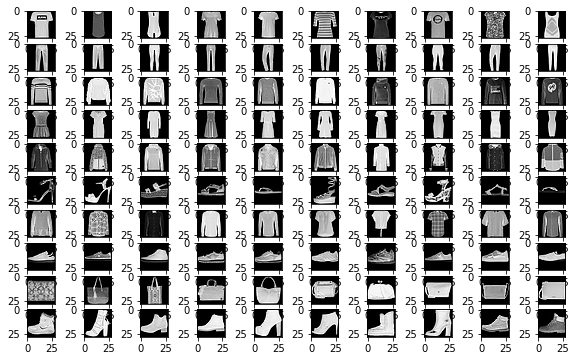

In [6]:
num_subplots = 10
fig, axes = pyplot.subplots(nrows=num_subplots, ncols=num_subplots, figsize=(10, 6))
for idx,ax in enumerate(axes.ravel()): 
    image_idx = np.where(trainy == int(idx / num_subplots))[0][idx % num_subplots]
    ax.imshow(trainX[image_idx], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [7]:
print(", ".join(class_names))

T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot


## Show data augmentation

In [8]:
# do data augmentation 
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
    )

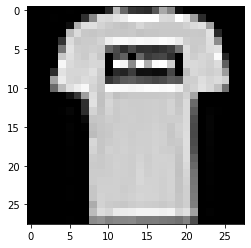

In [9]:
# format sample image
np_image = img_to_array(trainX[1])
samples = expand_dims(np_image, 0)
# plot original 
pyplot.imshow(np_image, cmap=pyplot.get_cmap('gray'))
pyplot.show()

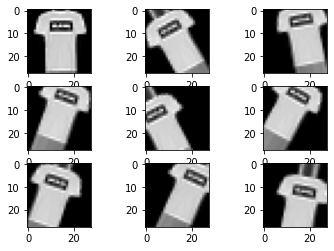

In [11]:
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # we plot original in top right corner
    if (i == 0): 
        pyplot.imshow(np_image, cmap=pyplot.get_cmap('gray'))
    else: 
        # plot raw pixel data
        pyplot.imshow(image, cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()